# Лабораторная работа №4
### Scikit-learn. Обучение без учителя
![Image of scikit](http://firstxw.com/Images/2017-08-30/fix/2/66372-20170122163639004-2105976941.jpg)


### Полезные ссылки:
Хорошм руководством по scikit-learn на практике будет страница Quick Start Tutorial и просмотр примеров кода по интересующим вас алгоритмам обучения в руководстве пользователя. Ну и конечно же API Reference будет отличным подспорьем при выполнении практических задач.

* [**Quick Start Tutorial**](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [**Руководство пользователя**](http://scikit-learn.org/stable/user_guide.html)
* [**API Reference**](http://scikit-learn.org/stable/modules/classes.html)
* [**Сборник примеров**](http://scikit-learn.org/stable/auto_examples/index.html)

**Обучение без учителя (unsupervised learning, неконтролируемое обучение)** – _класс методов машинного обучения_ для поиска шаблонов в наборе данных. Данные, получаемые на вход таких алгоритмов обычно не размечены, то есть передаются только входные переменные X без соответствующих меток y. Если в контролируемом обучении (обучении с учителем, supervised learning) система пытается извлечь уроки из предыдущих примеров, то в обучении без учителя – система старается самостоятельно найти шаблоны непосредственно из приведенного примера.
![images](https://proglib.io/wp-content/uploads/2018/05/mod1_SuperUnsuper.png)
На левой части изображения представлен пример контролируемого обучения: здесь для того, чтобы найти лучшую функцию, соответствующую представленным точкам, используется метод регрессии. В то же время при неконтролируемом обучении входные данные разделяются на основе представленных характеристик, а предсказание свойств основывается на том, какому кластеру принадлежит пример.

Методы кластеризации данных являются одним из наиболее популярных семейств машинного обучения без учителя. Рассмотрим некоторые из них подробнее.

### Терминология
* **Feature (Особенности)**: входная переменная, используемая для создания прогнозов.
* **Predictions (Прогнозы)**: выходные данные модели при наличии входного примера.
* **Example (Пример)**: строка набора данных. Пример обычно содержит один или несколько объектов.
* **Label (Метки)**: результат функции.

### Пример
Для составления прогнозов воспользуемся классическим набором данных ирисов Фишера. Датасет представляет набор из 150 записей с пятью атрибутами в следующем порядке: длина чашелистика (sepal length), ширина чашелистика (sepal width), длина лепестка (petal length), ширина лепестка (petal width) и класс, соответствующий одному из трех видов: Iris Setosa, Iris Versicolor или Iris Virginica, обозначенных соответственно 0, 1, 2. Наш алгоритм должен принимать четыре свойства одного конкретного цветка и предсказывать, к какому классу (виду ириса) он принадлежит. Имеющиеся в наборе данных метки можно использовать для оценки качества предсказания.

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


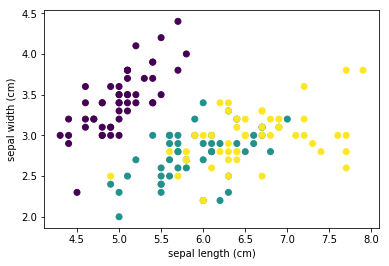

In [1]:
# Импортируем библиотеки
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
 
# Загружаем набор данных
iris_df = datasets.load_iris()
 
# Методы, доступные для набора данных
print(dir(iris_df))
 
# Признаки
print(iris_df.feature_names)
 
# Метки
print(iris_df.target)
 
# Имена меток
print(iris_df.target_names)
 
# Разделение набора данных
x_axis = iris_df.data[:, 0]  # Чашелистик длина
y_axis = iris_df.data[:, 1]  # Чашелистик ширина
 
# Построение
plt.xlabel(iris_df.feature_names[0])
plt.ylabel(iris_df.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

На диаграмме фиолетовым цветом обозначен вид Setosa, зеленым – Versicolor и желтым – Virginica. При построении были взяты лишь два признака. Вы можете проанализировать как разделяются классы при других комбинациях параметров.

### Метод K-Средних
Наиболее популярным алгоритмом кластеризации данных является метод k-средних. Это итеративный алгоритм кластеризации, основанный на минимизации суммарных квадратичных отклонений точек кластеров от центроидов (средних координат) этих кластеров.

Первоначально выбирается желаемое количество кластеров. Поскольку нам известно, что в нашем наборе данных есть 3 класса, установим параметр модели n_clusters равный трем.

Теперь случайным образом из входных данных выбираются три элемента выборки, в соответствие которым ставятся три кластера, в каждый из которых теперь включено по одной точке, каждая при этом является центроидом этого кластера.

Далее ищем ближайшего соседа текущего центроида. Добавляем точку к соответствующему кластеру и пересчитываем положение центроида с учетом координат новых точек.  Алгоритм заканчивает работу, когда координаты каждого центроида перестают меняться. Центроид каждого кластера в результате представляет собой набор значений признаков, описывающих усредненные параметры выделенных классов.

In [2]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans
 
# Загружаем набор данных
iris_df = datasets.load_iris()
 
# Описываем модель
model = KMeans(n_clusters=3)
 
# Проводим моделирование
model.fit(iris_df.data)
 
# Предсказание на единичном примере
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])
 
# Предсказание на всем наборе данных
all_predictions = model.predict(iris_df.data)
 
# Выводим предсказания
print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


При выводе данных нужно понимать, что алгоритм не знает ничего о нумерации классов, и числа 0, 1, 2 – это лишь номера кластеров, определенных в результате работы алгоритма. Так как исходные точки выбираются случайным образом, вывод будет несколько меняться от одного запуска к другому.

Характерной особенностью набора данных ирисов Фишера является то, что один класс (Setosa) легко отделяется от двух остальных. Это заметно и в приведенном примере.

### Метод кластеризации на основе плотности DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise, плотностной алгоритм пространственной кластеризации с присутствием шума) – популярный алгоритм кластеризации, используемый в анализе данных в качестве одной из замен метода k-средних.

Метод не требует предварительных предположений о числе кластеров, но нужно настроить два других параметра: eps и min_samples. Данные параметры – это соответственно максимальное расстояние между соседними точками и минимальное число точек в окрестности (количество соседей), когда можно говорить, что эти экземпляры данных образуют один кластер. В scikit-learn есть соответствующие значения параметров по умолчанию, но, как правило, их приходится настраивать самостоятельно.

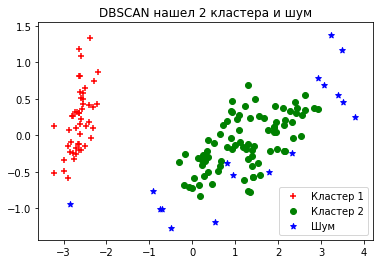

In [14]:
# Импортируем библиотеки
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
 
# Загружаем датасет
iris = load_iris()
 
# Определяем модель
dbscan = DBSCAN()
 
# Обучаем
dbscan.fit(iris.data)
 
# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
 
# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
 
plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

## Задания

**1) Используя pandas загрузить набор данных о игроках NBA и вывести первые пять записей**

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('nba_2013.csv')
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [16]:
numeric_cols = data[data.columns[(data.dtypes == 'int64') | (data.dtypes == 'float64')]]
numeric_cols = numeric_cols.dropna(axis=1)

Используя загруженный набор выполнить:
    - В переменную numeric_cols занести все числовые данные о игроках nba и удалить столбцы с NaN
    (используется команда dropna(axis=1))
    - Выполнить кластеризацию (разбить на 5 кластеров) на числовых данных с использованием алгоритма KMeans

In [44]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

km = KMeans(5)
km.fit(numeric_cols)
# print(numeric_cols.columns)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

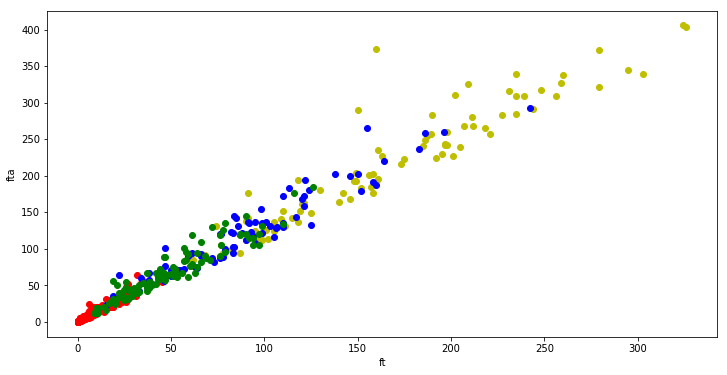

In [51]:
#В душе не представляю что из сокращений очки и помощь, поэтому будут столбцы ft, fta
x,y = numeric_cols.ft.values, numeric_cols.fta.values
x.shape
predictions = km.predict(numeric_cols)
colors ={
    0:'ro',
    1:'yo',
    2:'bo',
    3:'go',
    4:'ro',
}
t = np.concatenate((x.reshape(-1,1),y.reshape(-1,1),predictions.reshape(-1,1)), axis=1)
plt.figure(figsize=(12,6))
plt.xlabel('ft')
plt.ylabel('fta')

for i in range(0,4):
    cl = t[t[:,2] == i]
    plt.plot(cl[:,0],cl[:,1],colors[i])
    

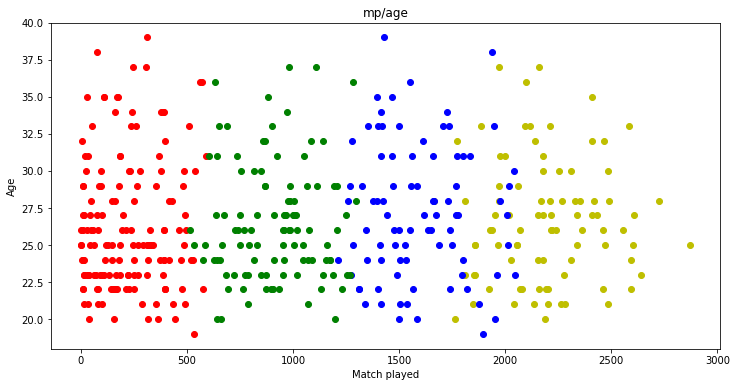

In [52]:
#опять же описание датасеты не загуглилось за 10 секунд, значит mp==played
x,y = numeric_cols.mp.values, numeric_cols.age.values
x.shape
predictions = km.predict(numeric_cols)
colors ={
    0:'ro',
    1:'yo',
    2:'bo',
    3:'go',
    4:'ro',
}
t = np.concatenate((x.reshape(-1,1),y.reshape(-1,1),predictions.reshape(-1,1)), axis=1)
plt.figure(figsize=(12,6))
plt.title('mp/age')
plt.xlabel('Match played')
plt.ylabel('Age')

for i in range(0,4):
    cl = t[t[:,2] == i]
    plt.plot(cl[:,0],cl[:,1],colors[i])

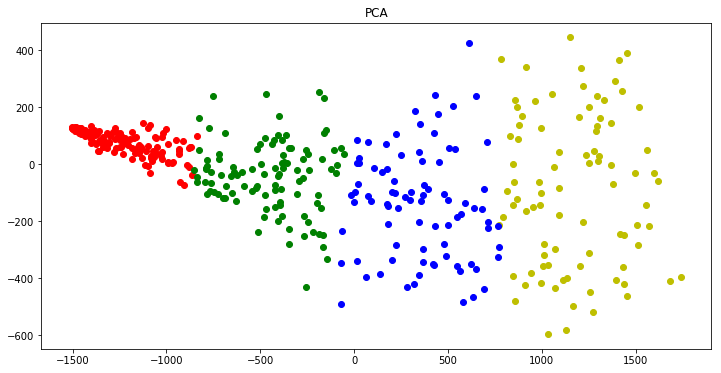

In [53]:
# Визуализация с использование PCA
pc = PCA(2)
d = pc.fit_transform(numeric_cols)
x,y = d[:,0], d[:,1]
predictions = km.predict(numeric_cols)
colors ={
    0:'ro',
    1:'yo',
    2:'bo',
    3:'go',
    4:'ro',
}
t = np.concatenate((x.reshape(-1,1),y.reshape(-1,1),predictions.reshape(-1,1)), axis=1)
plt.figure(figsize=(12,6))
plt.title('PCA')

for i in range(0,4):
    cl = t[t[:,2] == i]
    plt.plot(cl[:,0],cl[:,1],colors[i])

1. Выполнить визуализацию c использованием двух признаков Total points и Total assists
2. Выполнить визуализацию c использованием двух признаков Age и played

*Пояснить полученные графики*

Исходя из полученных графиков можно сказать, что выбранные мной "случайные метрики" ft,fta не отображают кластеры как таковые, однако график матчи/возраст показывает разбиение игроков по кол-ву игр, хоть и кластеры не так явно видны. Метод главных компонент более явно группирует данные по кластерам, но интепретировать его показатели в нынешнем варианте затруднительно, хотя и можно рассмотреть влияние свойств через components_